In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from random import expovariate
import pandas as pd
import seaborn as sns

# Women Age range 50-54 - 376 cases per 10**4
a = 376/10**5
a

0.00376

(array([99604.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   396.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

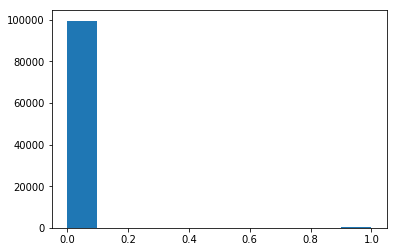

In [2]:
n, p = 1, a  # number of trials, probability of each trial
s = np.random.binomial(n, p, 100000)


dataset = pd.DataFrame(s)
plt.hist(s)

In [3]:
n = 1  # number of trials
sum_of_male_cases = []


# Probabilities and intervals from CancerResearchUK
labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39']
male_interval = [0.0043,0.00259,0.00227,0.00418,0.00696,0.01086,0.01401,0.01666]#probability each age interval


# Simulate tests in sample population
male_distribution = []
for i in male_interval:
    p = i
    male_distribution = np.random.binomial(n, p, 100000) #cases per interval using binomial distribution with probabilites from from cancerresearchuk
    sum_of_male_cases.append(male_distribution.sum()) # each age group is tested for cancer and random positives are chosen from the population based on numbers from canceruk.
print(sum_of_male_cases)





[455, 236, 214, 414, 708, 1092, 1405, 1662]


In [4]:
sum_of_female_cases = []

female_interval = [0.0037,0.00183,0.00205,0.004,0.00787,0.01682,0.02426,0.03293]


female_distribution = []
for i in female_interval:
    p = i
    female_distribution = np.random.binomial(n, p, 100000) #cases per interval using binomial distribution with probabilites from from cancerresearchuk
    sum_of_female_cases.append(female_distribution.sum()) # each age group is tested for cancer and random positives are chosen from the population based on numbers from canceruk.
print(sum_of_female_cases)


[409, 175, 181, 355, 804, 1700, 2387, 3269]


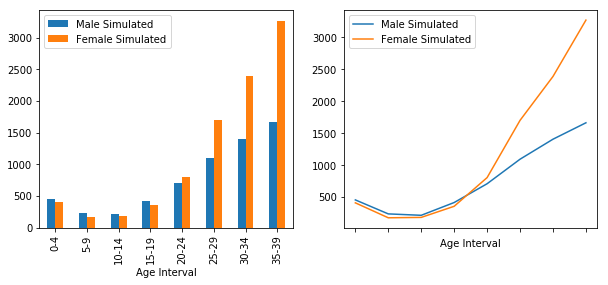

In [5]:
# Create Pandas Dataframe from simulation results
labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39']
myframe = pd.DataFrame(sum_of_male_cases, columns=['Male Simulated'])
myframe['Age Interval'] = labels #created new column in dataframe for interval labels
myframe['Female Simulated'] = sum_of_female_cases
myframe.set_index("Age Interval",drop=True,inplace=True)#used Pandas set index method to set col as index
myframe['Actual Male Cases'] = [430, 259, 227,418,696,1086,1401,1666]
myframe['Actual Female Cases'] = [370,183,205,400,787,1682,2426,3293]

# Plot results of Binomial Distribution
fig=plt.figure(figsize=(10,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

myframe[['Male Simulated','Female Simulated']].plot(kind='bar',ax=ax1)
#line plot is better visualisation
myframe[['Male Simulated','Female Simulated']].plot(kind='line',ax=ax2)

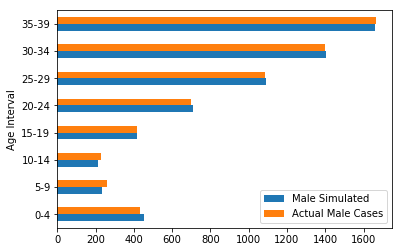

In [24]:
myframe[['Male Simulated','Actual Male Cases']].plot(kind='barh')

In [7]:
myframe

Male Simulated  Female Simulated  Actual Male Cases  \
Age Interval                                                        
0-4                      455               409                430   
5-9                      236               175                259   
10-14                    214               181                227   
15-19                    414               355                418   
20-24                    708               804                696   
25-29                   1092              1700               1086   
30-34                   1405              2387               1401   
35-39                   1662              3269               1666   

              Actual Female Cases  
Age Interval                       
0-4                           370  
5-9                           183  
10-14                         205  
15-19                         400  
20-24                         787  
25-29                        1682  
30-34                        2426  
35-39                        3293

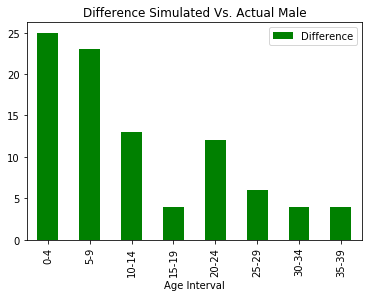

In [54]:
Difference = myframe['Male Simulated']-myframe['Actual Male Cases']
myframe['Difference'] = Difference.abs()

myframe[['Difference']].plot(kind='bar',color='g',title='Difference Simulated Vs. Actual Male')

In [9]:
dataset.describe()

0
count  100000.000000
mean        0.003960
std         0.062804
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

In [10]:
dataset.sum() #average incidence rate of cancer 

0    396
dtype: int64

54
93
43
25
76
194
5
62
0
42
7
10
10
14
85
14
99
87
5
25
22
29
140
73
56
12
33
54
3
170
18
9
12
13
42
49
14
27
25
36
62
120
22
84
8
15
26
10
37
2
87
2
173
5
29
32
126
115
35
14
1
14
56
70
38
38
5
65
12
7
16
32
5
1
54
15
30
301
58


[]

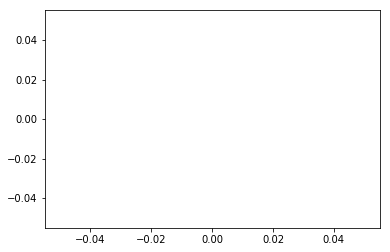

In [11]:
year = 0
results = []

for year in range(1,80):
    year = int(expovariate(1/59)) #cases per year using exponential distribution with mean no. of cases from cancerresearchuk
    print(year)
    results.append(year)
   
    
np.array(results)



plt.show()

my_df = pd.DataFrame(results)

plt.plot(x=my_df.index.values,y=my_df)


https://www.cancerresearchuk.org/health-professional/cancer-statistics/incidence/age#heading-Zero
https://stackoverflow.com/questions/1155539/how-do-i-generate-a-poisson-process/10250877#10250877

https://www.dataquest.io/blog/adding-axis-labels-to-plots-with-pandas-and-matplotlib/

In [12]:
my_df

0
0    54
1    93
2    43
3    25
4    76
5   194
6     5
7    62
8     0
9    42
10    7
11   10
12   10
13   14
14   85
15   14
16   99
17   87
18    5
19   25
20   22
21   29
22  140
23   73
24   56
25   12
26   33
27   54
28    3
29  170
..  ...
49    2
50   87
51    2
52  173
53    5
54   29
55   32
56  126
57  115
58   35
59   14
60    1
61   14
62   56
63   70
64   38
65   38
66    5
67   65
68   12
69    7
70   16
71   32
72    5
73    1
74   54
75   15
76   30
77  301
78   58

[79 rows x 1 columns]

In [13]:
myframe




Male Simulated  Female Simulated  Actual Male Cases  \
Age Interval                                                        
0-4                      455               409                430   
5-9                      236               175                259   
10-14                    214               181                227   
15-19                    414               355                418   
20-24                    708               804                696   
25-29                   1092              1700               1086   
30-34                   1405              2387               1401   
35-39                   1662              3269               1666   

              Actual Female Cases  
Age Interval                       
0-4                           370  
5-9                           183  
10-14                         205  
15-19                         400  
20-24                         787  
25-29                        1682  
30-34                        2426  
35-39                        3293

In [14]:
test = np.random.binomial(100000, .3, 1)

In [15]:
print(len(test))

1


In [16]:
myframe


Male Simulated  Female Simulated  Actual Male Cases  \
Age Interval                                                        
0-4                      455               409                430   
5-9                      236               175                259   
10-14                    214               181                227   
15-19                    414               355                418   
20-24                    708               804                696   
25-29                   1092              1700               1086   
30-34                   1405              2387               1401   
35-39                   1662              3269               1666   

              Actual Female Cases  
Age Interval                       
0-4                           370  
5-9                           183  
10-14                         205  
15-19                         400  
20-24                         787  
25-29                        1682  
30-34                        2426  
35-39                        3293